# What is the most optimal skills for Data Analyst?

In [193]:
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval (x) if pd.notna(x) else x)

In [194]:
df_DA_IND = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')]

In [195]:
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])
df_DA_IND_exploded = df_DA_IND.explode('job_skills')
df_DA_IND_exploded[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
56450,57500.0,tableau
56450,57500.0,power bi
60528,105000.0,r
60528,105000.0,python
60528,105000.0,spss


In [196]:
df_DA_skills = df_DA_IND_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_job_count = len(df_DA_IND)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / df_job_count * 100
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,8,111175.0,53.333333
python,6,111175.0,40.000000
tableau,5,111175.0,33.333333
excel,5,111175.0,33.333333
r,4,111175.0,26.666667
powerpoint,4,111175.0,26.666667
power bi,3,111175.0,20.000000
spark,3,111175.0,20.000000
slack,2,106837.5,13.333333


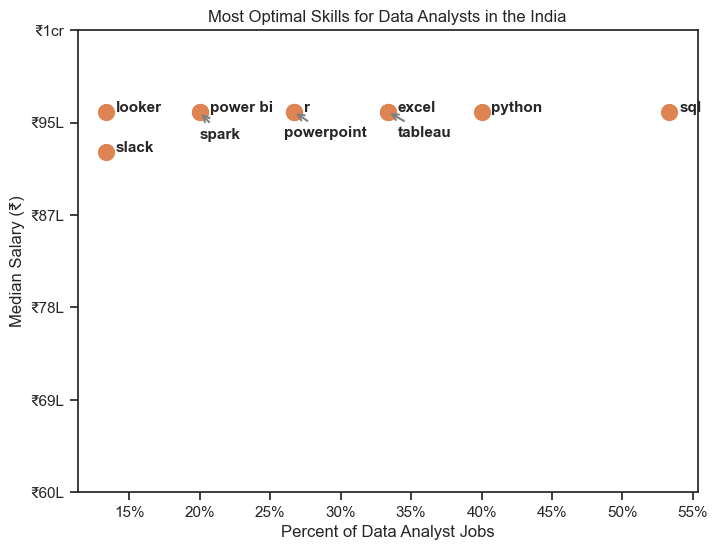

In [197]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 6))
plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (₹)') 
plt.title('Most Optimal Skills for Data Analysts in the India')
plt.ylim(70000, 120000)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"₹{int(y * 87/100000)}L" if y < 120000 else "₹1cr")) 
plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'], s=130)

texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]
    if skill == "powerpoint":
        plt.annotate(
            skill,
            (x, y),
            xytext=(x - 0.7, y - 2700),  
            fontsize=11,
            weight='bold',
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        )
    elif skill == "tableau":
        plt.annotate(
            skill,
            (x, y),
            xytext=(x + 0.7, y - 2700),  
            fontsize=11,
            weight='bold',
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        )
    elif skill == "spark":
        plt.annotate(
            skill,
            (x, y),
            xytext=(x, y - 2900), 
            fontsize=11,
            weight='bold',
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        )
    else:
        plt.annotate(
            skill,
            (x, y),
            xytext=(x + 0.7, y), 
            fontsize=11,
            weight='bold',    
        )
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


In [198]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['visio',
  'sas',
  'microstrategy',
  'spreadsheet',
  'ssrs',
  'alteryx',
  'nuix',
  'msaccess',
  'splunk',
  'excel',
  'powerpoint',
  'sap',
  'cognos',
  'spss',
  'ms access',
  'outlook',
  'power bi',
  'word',
  'dax',
  'ssis',
  'esquisse',
  'tableau',
  'datarobot',
  'sharepoint',
  'qlik',
  'looker',
  'sheets',
  'powerbi'],
 'programming': ['kotlin',
  'sas',
  'f#',
  'typescript',
  'c++',
  'shell',
  'assembly',
  'c',
  'vb.net',
  'crystal',
  'sql',
  'lua',
  'sass',
  'rust',
  'javascript',
  'dart',
  'perl',
  'c#',
  'pascal',
  'groovy',
  'visual basic',
  'powershell',
  'swift',
  'elixir',
  'scala',
  'css',
  'php',
  'cobol',
  'ocaml',
  'golang',
  'fortran',
  'clojure',
  'apl',
  'mongo',
  'lisp',
  'python',
  'erlang',
  'haskell',
  'visualbasic',
  't-sql',
  'julia',
  'no-sql',
  'java',
  'mongodb',
  'go',
  'html',
  'nosql',
  'bash',
  'ruby',
  'objective-c',
  'solidity',
  'matlab',
  'vba',
  'r',
  'del

In [199]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,visio
0,analyst_tools,sas
0,analyst_tools,microstrategy
0,analyst_tools,spreadsheet
0,analyst_tools,ssrs
...,...,...
9,sync,twilio
9,sync,wire
9,sync,slack
9,sync,mattermost


In [200]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech


,skill_count,median_salary,skill_percent,technology,skills
0,8,111175.0,53.333333,programming,sql
1,6,111175.0,40.000000,programming,python
2,5,111175.0,33.333333,analyst_tools,tableau
3,5,111175.0,33.333333,analyst_tools,excel
4,4,111175.0,26.666667,programming,r
5,4,111175.0,26.666667,analyst_tools,powerpoint
6,3,111175.0,20.000000,analyst_tools,power bi
7,3,111175.0,20.000000,libraries,spark
8,2,106837.5,13.333333,sync,slack
9,2,111188.5,13.333333,analyst_tools,looker


In [202]:
skill_limit = 5
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

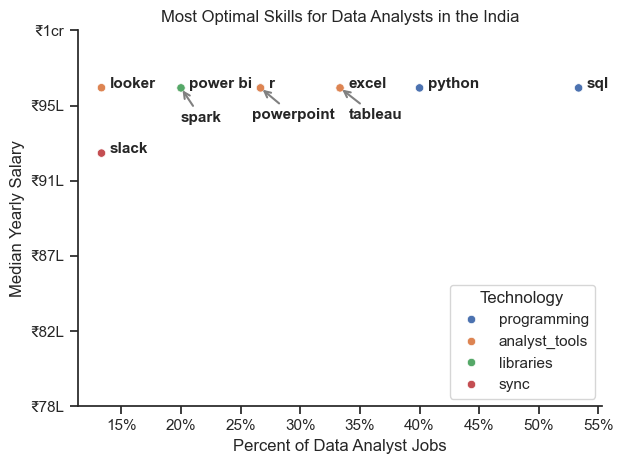

In [ ]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# adjustText
texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]
    if skill == "powerpoint":
        plt.annotate(
            skill,
            (x, y),
            xytext=(x - 0.7, y - 2100),  
            fontsize=11,
            weight='bold',
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        )
    elif skill == "tableau":
        plt.annotate(
            skill,
            (x, y),
            xytext=(x + 0.7, y - 2100),  
            fontsize=11,
            weight='bold',
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        )
    elif skill == "spark":
        plt.annotate(
            skill,
            (x, y),
            xytext=(x, y - 2300), 
            fontsize=11,
            weight='bold',
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        )
    else:
        plt.annotate(
            skill,
            (x, y),
            xytext=(x + 0.7, y), 
            fontsize=11,
            weight='bold',    
        )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the India')
plt.legend(title='Technology',loc='lower right')
plt.ylim(90000, 115000)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"₹{int(y * 87/100000)}L" if y < 115000 else "₹1cr"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()